In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("doggo.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#Sampling 
def sampling(image, factor):
    return image[::factor, ::factor]

#Quantization 
def quantization(image, levels):
    div = 256 // levels
    return (image // div) * div

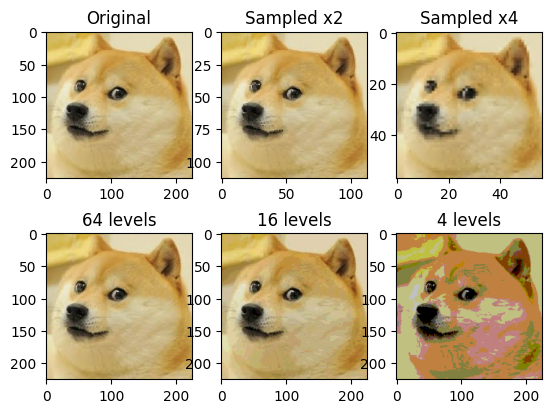

In [5]:
#Original
plt.subplot(231), plt.imshow(img), plt.title("Original")

# Sampling Examples
sampled_2 = sampling(img, 2)
plt.subplot(232), plt.imshow(sampled_2), plt.title("Sampled x2")

sampled_4 = sampling(img, 4)
plt.subplot(233), plt.imshow(sampled_4), plt.title("Sampled x4")

# Quantization Examples
quant_64 = quantization(img, 64)
plt.subplot(234), plt.imshow(quant_64), plt.title("64 levels")

quant_16 = quantization(img, 16)
plt.subplot(235), plt.imshow(quant_16), plt.title("16 levels")

quant_4 = quantization(img, 4)
plt.subplot(236), plt.imshow(quant_4), plt.title("4 levels")

plt.show()


In [7]:
quant_img = quantization(img, 16)
unique_vals = np.unique(quant_img.reshape(-1, 3), axis=0)
print("Unique color levels:", len(unique_vals))

Unique color levels: 251


In [11]:
#HSV and quantize
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv_quant = quantization(hsv, 16)
print("HSV quantized levels:", len(np.unique(hsv_quant.reshape(-1, 3), axis=0)))

HSV quantized levels: 393


In [ ]:
#YCrCb and quantize
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
ycrcb_quant = quantization(ycrcb, 16)
print("YCrCb quantized levels:", len(np.unique(ycrcb_quant.reshape(-1, 3), axis=0)))
